In [2]:
import numpy as np 
import pandas as pd
import requests

<h2>Reading the dataset from the URL and adding the related headers</h2>


<p> The below function is use to dowmload a dataset </p>

In [12]:
def download (url, fileName):
    response = requests.get(url)
    if response.status_code == 200:
        with open(fileName, "wb") as f:
            f.write(response.content)

In [13]:
file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'

In [14]:
download(file_path, "auto.csv")
file_name = "auto.csv"

In [23]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [16]:
df = pd.read_csv(file_name, names=headers)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### How to work with Missing Data

1. Identify missing values
2. Dead with missing values
3. Correct data format

<h1>Identify and Handle Missing Values</h1>

Convert '?' to NaN.. we use replace method for that

In [17]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [20]:
missing_data = df.isnull()
missing_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
### List out missing values 
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

### Deal with missing data
<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


calculate the mean value for normalized-losses

In [27]:
## we have to convert the object data type to float
mean_normalLosses = df["normalized-losses"].astype("float").mean(axis = 0)
print("mean of normalized-losses column: " ,mean_normalLosses)

mean of normalized-losses column:  122.0


In [49]:
## Replace np.nan values by mean
df["normalized-losses"] = df["normalized-losses"].fillna(mean_normalLosses)
print(df["normalized-losses"].head(10))

for item in df["normalized-losses"].isnull().values:
    if (item == True):
        print (item)


0    122.0
1    122.0
2    122.0
3      164
4      164
5    122.0
6      158
7    122.0
8      158
9    122.0
Name: normalized-losses, dtype: object


Calculate the mean value for bore column


In [33]:
## covert bore data object data type float data type

mean_bore = df["bore"].astype("float").mean(axis = 0 )
print("mean of bore column: ", mean_bore)

mean of bore column:  3.3297512437810943


In [48]:
##replace the NaN values of bore column by mean value
df["bore"] = df["bore"].fillna(mean_bore)
print(df["bore"].head(10))
for item in df["bore"].isnull().values:
    if (item == True):
        print (item)

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
5    3.19
6    3.19
7    3.19
8    3.13
9    3.13
Name: bore, dtype: object


Calculate mean value for stroke

In [ ]:
## convert object data type for float data type
mean_stroke = df["stroke"].astype("float").mean(axis= 0)
print("Mean of stroke column: ", mean_stroke)

Mean of stroke column:  3.255422885572139


In [ ]:
## replace NaN values by mean value in thr stroke column
df["stroke"] = df["stroke"].fillna(mean_bore)
print(df["stroke"].head(10))

for item in df["stroke"].isnull().values:
    if (item == True):
        print (item)

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
5    3.40
6    3.40
7    3.40
8    3.40
9    3.40
Name: stroke, dtype: object


Calculate mean value for horsepower column

In [53]:
## Convert object data type to float data type
mean_horsepower = df["horsepower"].astype("float").mean(axis = 0) 
print("Mean value of horesepower column: ", mean_horsepower)

Mean value of horesepower column:  104.25615763546799


In [54]:
## Replace NaN values by mean value in horsepower column
df["horsepower"] = df["horsepower"].fillna(mean_horsepower)
print(df["horsepower"].head(10))

for item in df["horsepower"].isnull().values:
    if(item == True):
        print(item)

0    111
1    111
2    154
3    102
4    115
5    110
6    110
7    110
8    140
9    160
Name: horsepower, dtype: object


Calculate mean value for peak-rpm

In [56]:
## Convert object data type into float data type
mean_peak_rpm = df["peak-rpm"].astype("float").mean(axis =0)
print("Mean of peak-rpm column: ", mean_peak_rpm)

Mean of peak-rpm column:  5125.369458128079


In [58]:
## replace the NaN values by mean value in peak-rpm column
df['peak-rpm'] = df['peak-rpm'].fillna(mean_peak_rpm)
print(df['peak-rpm'].head(10))

for item in df['peak-rpm'].isnull().values:
    if(item == True):
        print(item)

0    5000
1    5000
2    5000
3    5500
4    5500
5    5500
6    5500
7    5500
8    5500
9    5500
Name: peak-rpm, dtype: object


Replace with Most Frequent Value

Column num-of-doors we can replace its missing values with most frequent value that column used.

In [59]:
## to see which values are present we can use values_count()

df['num-of-doors'].value_counts

<bound method IndexOpsMixin.value_counts of 0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: str>

In [60]:
# to get most used value we use idmax()
df['num-of-doors'].value_counts().idxmax()

'four'

In [65]:
df['num-of-doors'] =  df['num-of-doors'].fillna('four')
print(df['num-of-doors'].head(10))

for item in df['num-of-doors'].isnull().values:
    if(item == True):
        print(item)

0     two
1     two
2     two
3    four
4    four
5     two
6    four
7    four
8    four
9     two
Name: num-of-doors, dtype: str


finally drop values in the price column that is NaN


In [68]:
## to delete null values we use dropna() function
df.dropna(subset=['price'], axis=0, inplace=True)

##reset indexs
df.reset_index(drop=True, inplace=True)

In [70]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,stoke
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,2.68
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,2.68
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,3.47
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,3.40
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,3.40
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,3.40
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,3.40
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,3.40
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,3.40
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430,2.80


<h3>Correct Data Format </h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [71]:
## list the data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                     str
fuel-type                str
aspiration               str
num-of-doors             str
body-style               str
drive-wheels             str
engine-location          str
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type              str
num-of-cylinders         str
engine-size            int64
fuel-system              str
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                    str
stoke                 object
dtype: object

In [79]:
##using [] it will be a dataframe

df[['stroke','bore']] = df[['stroke','bore']].astype('float')
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

In [80]:
df.dtypes

symboling              int64
normalized-losses      int64
make                     str
fuel-type                str
aspiration               str
num-of-doors             str
body-style               str
drive-wheels             str
engine-location          str
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type              str
num-of-cylinders         str
engine-size            int64
fuel-system              str
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
stoke                 object
dtype: object

<h2> Data Standardization </h2>



<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


In [82]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,stoke
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,2.68
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,2.68
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,3.47
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,3.40
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,3.40


In [ ]:
## city/mpg to L/100km
## new column added with standardization

df['city-L/100km'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,stoke,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27,13495.0,2.68,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27,16500.0,2.68,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19.0,26,16500.0,3.47,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24.0,30,13950.0,3.40,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18.0,22,17450.0,3.40,13.055556


<h2> Data Normalization </h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<p> There are three main methods: </p>
1. Simple Feature method
2. Min-Max Method
3. Z- Score Method

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [86]:
##Simple feature method
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,stoke,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27,13495.0,2.68,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27,16500.0,2.68,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19.0,26,16500.0,3.47,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24.0,30,13950.0,3.40,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18.0,22,17450.0,3.40,13.055556


In [87]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'stoke', 'city-L/100km'],
      dtype='str')

In [88]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [89]:
df[['length', 'width']].head()

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222


In [90]:
df[['curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke']].head()

,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke
0,2548,dohc,four,130,mpfi,3.47,2.68
1,2548,dohc,four,130,mpfi,3.47,2.68
2,2823,ohcv,six,152,mpfi,2.68,3.47
3,2337,ohc,four,109,mpfi,3.19,3.40
4,2824,ohc,five,136,mpfi,3.19,3.40


## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [93]:
df.dtypes

symboling              int64
normalized-losses      int64
make                     str
fuel-type                str
aspiration               str
num-of-doors             str
body-style               str
drive-wheels             str
engine-location          str
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type              str
num-of-cylinders         str
engine-size            int64
fuel-system              str
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg             float64
highway-mpg            int64
price                float64
stoke                 object
city-L/100km         float64
dtype: object

In [ ]:
df['horsepower'] = df['horsepower'].astype(int, copy= True) ## get horespower as series and make the copy

C:\Users\Vish\AppData\Local\Temp\ipykernel_2432\3923765297.py:1: Pandas4Warning: The copy keyword is deprecated and will be removed in a future version. Copy-on-Write is active in pandas since 3.0 which utilizes a lazy copy mechanism that defers copies until necessary. Use .copy() to make an eager copy if necessary.
  df['horsepower'] = df['horsepower'].astype(int, copy= True) ## get horespower as series and make the copy


Text(0.5, 1.0, 'horsepower bin')

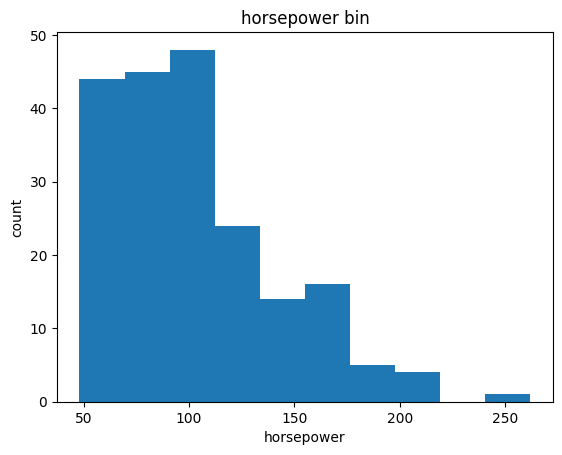

In [99]:
## plotting the horsepower diagram

import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'])

#set x/y labels
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bin')

In [ ]:
# we need to create bin for specifying linspaces

bin_horsepower = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
label_horsepower = ['Low', 'Medium', 'High']

df['horsepower'] = pd.cut()